In [1]:
import os
import pandas as pd
from functools import reduce

In [27]:
combo_files = [
    "/data6/deepro/ukb_bmi/2_rarecomb/data/british/combo2.csv",
    "/data6/deepro/ukb_bmi/2_rarecomb/data/british/combo3.csv"
]

combo_info_files = [
    "/data6/deepro/ukb_bmi/3_characterization/data/combo_info/british/validation_combo2.csv",
    "/data6/deepro/ukb_bmi/3_characterization/data/combo_info/british/validation_combo3.csv"
]

combo_info_df = pd.concat([pd.read_csv(cif) for cif in combo_info_files])
combo_df = pd.concat([pd.read_csv(cf, usecols=["uniq_items", "Case_Samples", "Control_Samples"]) for cf in combo_files])

In [28]:
combo_info_df = combo_info_df.merge(combo_df, on="uniq_items")

In [29]:
combo_info_df = combo_info_df.fillna("")

In [5]:
combo_genes = set("|".join(combo_info_df.uniq_items.str.replace("Input_", "").values).split("|"))
combo_samples = set("|".join(combo_info_df.combo_samples.fillna("").values).split("|"))
combo_case_samples = set("|".join(combo_info_df.Case_Samples.values).split("|"))
combo_control_samples = set("|".join(combo_info_df.Control_Samples.values).split("|"))

In [6]:
def get_vtype_df(block_df, combo_genes, combo_samples, combo_case_samples, combo_control_samples):
    # select lof and deleterious missense variants
    block_df = block_df.loc[(block_df.lof==True)|(block_df.splice_lof==True)|((block_df.missense==True)&(block_df.del_score>4))]
    block_df["samples"] = block_df.samples.str.split(",")
    block_df = block_df.explode("samples")
    block_df = block_df.loc[(block_df.samples.isin(combo_samples.union(combo_case_samples).union(combo_control_samples))) & (block_df.gene.isin(combo_genes))]
    block_df["variant"] = block_df.gene + "_" + block_df.locus + "_" + block_df.alleles
    return block_df

In [7]:
vcfs_per_chrm = {
    "chr1": 97, "chr2": 71, "chr3": 56, "chr4": 39, "chr5": 43, "chr6": 48, 
    "chr7": 47, "chr8": 35, "chr9": 42, "chr10": 40, "chr11": 57, "chr12": 52, 
    "chr13": 18, "chr14": 30, "chr15": 34, "chr16": 47, "chr17": 56, "chr18": 16, 
    "chr19": 65, "chr20": 25, "chr21": 11, "chr22": 23, "chrX": 24, "chrY": 1
}
annot_table_dir = "/data6/deepro/ukb_bmi/0_data_preparation_and_download/exome_annot/data/annot_tables_vep109"

variant_df = pd.DataFrame()
for chr_num in [f"chr{i}" for i in range(1,23)] + ["chrX", "chrY"]:
    print(chr_num)
    chr_file_num = vcfs_per_chrm[chr_num]
    for filei in range(chr_file_num):
        block_file = os.path.join(annot_table_dir, f"{chr_num}", f"block_{filei}.tsv.gz")
        block_df = pd.read_csv(block_file, sep="\t", index_col=0)
        block_df = get_vtype_df(block_df, combo_genes, combo_samples, combo_case_samples, combo_control_samples)
        variant_df = pd.concat((variant_df, block_df))

chr1


/tmp/ipykernel_20246/346471560.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  block_df["samples"] = block_df.samples.str.split(",")
/tmp/ipykernel_20246/346471560.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  block_df["samples"] = block_df.samples.str.split(",")
/tmp/ipykernel_20246/346471560.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

chr2


/tmp/ipykernel_20246/346471560.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  block_df["samples"] = block_df.samples.str.split(",")
/tmp/ipykernel_20246/346471560.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  block_df["samples"] = block_df.samples.str.split(",")
/tmp/ipykernel_20246/346471560.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

chr3


/tmp/ipykernel_20246/346471560.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  block_df["samples"] = block_df.samples.str.split(",")
/tmp/ipykernel_20246/346471560.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  block_df["samples"] = block_df.samples.str.split(",")
/tmp/ipykernel_20246/346471560.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

chr4


/tmp/ipykernel_20246/346471560.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  block_df["samples"] = block_df.samples.str.split(",")
/tmp/ipykernel_20246/346471560.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  block_df["samples"] = block_df.samples.str.split(",")
/tmp/ipykernel_20246/346471560.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

chr5


/tmp/ipykernel_20246/346471560.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  block_df["samples"] = block_df.samples.str.split(",")
/tmp/ipykernel_20246/346471560.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  block_df["samples"] = block_df.samples.str.split(",")
/tmp/ipykernel_20246/346471560.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

chr6


/tmp/ipykernel_20246/346471560.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  block_df["samples"] = block_df.samples.str.split(",")
/tmp/ipykernel_20246/346471560.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  block_df["samples"] = block_df.samples.str.split(",")
/tmp/ipykernel_20246/346471560.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

chr7


/tmp/ipykernel_20246/346471560.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  block_df["samples"] = block_df.samples.str.split(",")
/tmp/ipykernel_20246/346471560.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  block_df["samples"] = block_df.samples.str.split(",")
/tmp/ipykernel_20246/346471560.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

chr8


/tmp/ipykernel_20246/346471560.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  block_df["samples"] = block_df.samples.str.split(",")
/tmp/ipykernel_20246/346471560.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  block_df["samples"] = block_df.samples.str.split(",")
/tmp/ipykernel_20246/346471560.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

chr9


/tmp/ipykernel_20246/346471560.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  block_df["samples"] = block_df.samples.str.split(",")
/tmp/ipykernel_20246/346471560.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  block_df["samples"] = block_df.samples.str.split(",")
/tmp/ipykernel_20246/346471560.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

chr10


/tmp/ipykernel_20246/346471560.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  block_df["samples"] = block_df.samples.str.split(",")
/tmp/ipykernel_20246/346471560.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  block_df["samples"] = block_df.samples.str.split(",")
/tmp/ipykernel_20246/346471560.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

chr11


/tmp/ipykernel_20246/346471560.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  block_df["samples"] = block_df.samples.str.split(",")
/tmp/ipykernel_20246/346471560.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  block_df["samples"] = block_df.samples.str.split(",")
/tmp/ipykernel_20246/346471560.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

chr12


/tmp/ipykernel_20246/346471560.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  block_df["samples"] = block_df.samples.str.split(",")
/tmp/ipykernel_20246/346471560.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  block_df["samples"] = block_df.samples.str.split(",")
/tmp/ipykernel_20246/346471560.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

chr13


/tmp/ipykernel_20246/346471560.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  block_df["samples"] = block_df.samples.str.split(",")
/tmp/ipykernel_20246/346471560.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  block_df["samples"] = block_df.samples.str.split(",")
/tmp/ipykernel_20246/346471560.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

chr14


/tmp/ipykernel_20246/346471560.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  block_df["samples"] = block_df.samples.str.split(",")
/tmp/ipykernel_20246/346471560.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  block_df["samples"] = block_df.samples.str.split(",")
/tmp/ipykernel_20246/346471560.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

chr15


/tmp/ipykernel_20246/346471560.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  block_df["samples"] = block_df.samples.str.split(",")
/tmp/ipykernel_20246/346471560.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  block_df["samples"] = block_df.samples.str.split(",")
/tmp/ipykernel_20246/346471560.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

chr16


/tmp/ipykernel_20246/346471560.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  block_df["samples"] = block_df.samples.str.split(",")
/tmp/ipykernel_20246/346471560.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  block_df["samples"] = block_df.samples.str.split(",")
/tmp/ipykernel_20246/346471560.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

chr17


/tmp/ipykernel_20246/346471560.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  block_df["samples"] = block_df.samples.str.split(",")
/tmp/ipykernel_20246/346471560.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  block_df["samples"] = block_df.samples.str.split(",")
/tmp/ipykernel_20246/346471560.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

chr18


/tmp/ipykernel_20246/346471560.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  block_df["samples"] = block_df.samples.str.split(",")
/tmp/ipykernel_20246/346471560.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  block_df["samples"] = block_df.samples.str.split(",")
/tmp/ipykernel_20246/346471560.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

chr19


/tmp/ipykernel_20246/346471560.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  block_df["samples"] = block_df.samples.str.split(",")
/tmp/ipykernel_20246/346471560.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  block_df["samples"] = block_df.samples.str.split(",")
/tmp/ipykernel_20246/346471560.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

chr20


/tmp/ipykernel_20246/346471560.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  block_df["samples"] = block_df.samples.str.split(",")
/tmp/ipykernel_20246/346471560.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  block_df["samples"] = block_df.samples.str.split(",")
/tmp/ipykernel_20246/346471560.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

chr21


/tmp/ipykernel_20246/346471560.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  block_df["samples"] = block_df.samples.str.split(",")
/tmp/ipykernel_20246/346471560.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  block_df["samples"] = block_df.samples.str.split(",")
/tmp/ipykernel_20246/346471560.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

chr22


/tmp/ipykernel_20246/346471560.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  block_df["samples"] = block_df.samples.str.split(",")
/tmp/ipykernel_20246/346471560.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  block_df["samples"] = block_df.samples.str.split(",")
/tmp/ipykernel_20246/346471560.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

chrX


/tmp/ipykernel_20246/346471560.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  block_df["samples"] = block_df.samples.str.split(",")
/tmp/ipykernel_20246/346471560.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  block_df["samples"] = block_df.samples.str.split(",")
/tmp/ipykernel_20246/346471560.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

chrY


/tmp/ipykernel_20246/346471560.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  block_df["samples"] = block_df.samples.str.split(",")
/tmp/ipykernel_20246/346471560.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  block_df["samples"] = block_df.samples.str.split(",")
/tmp/ipykernel_20246/346471560.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

In [25]:
def get_combo_case_loci(variant_case_df):
    combo_case_loci = set()
    for gn, gdf in variant_case_df.groupby("samples"):
        gdf = gdf.sort_values(["variant"])
        combo_case_locus = "|".join((gdf.variant).values)
        combo_case_loci.update([combo_case_locus])
    return combo_case_loci

def get_same_variant_samples(variant_subset_df, combo_case_variant_loci):
    same_variant_samples = set()
    diff_variant_samples = set()
    for gn, gdf in variant_subset_df.groupby("samples"):
        gdf = gdf.sort_values(["variant"])
        combo_cont_locus = "|".join((gdf.variant).values)
        if combo_cont_locus in combo_case_variant_loci:
            same_variant_samples.update([gn])
        else:
            diff_variant_samples.update([gn])
    return same_variant_samples, diff_variant_samples

def get_samples_with_same_variants(ser, variant_df, vtype="variant"):
    genes = ser.uniq_items.replace("Input_", "").split("|")
    case_samples = set(ser.Case_Samples.split("|"))
    control_samples = set(ser.Control_Samples.split("|"))
    all_samples = set(ser.combo_samples.split("|"))
    other_samples = all_samples.difference(case_samples.union(control_samples))
    variant_case_df = variant_df.loc[(variant_df.gene.isin(genes))&(variant_df.samples.isin(case_samples))]
    combo_case_variant_loci = get_combo_case_loci(variant_case_df)
    variant_control_df = variant_df.loc[(variant_df.gene.isin(genes))&(variant_df.samples.isin(control_samples))]
    variant_other_df = variant_df.loc[(variant_df.gene.isin(genes))&(variant_df.samples.isin(other_samples))]
    control_samples_same_variants, control_samples_other_variants = get_same_variant_samples(variant_control_df, combo_case_variant_loci)
    other_samples_same_variants, other_samples_other_variants = get_same_variant_samples(variant_other_df, combo_case_variant_loci)
    return pd.Series({
        "control_samples_same_variants": "|".join(control_samples_same_variants), 
        "control_samples_other_variants": "|".join(control_samples_other_variants),
        "other_samples_same_variants": "|".join(other_samples_same_variants), 
        "other_samples_other_variants": "|".join(other_samples_other_variants),
        })

In [30]:
combo_info_df = combo_info_df.merge(combo_info_df.apply(get_samples_with_same_variants, args=(variant_df, "variant"), axis=1), left_index=True, right_index=True)

In [31]:
combo_info_df

,uniq_items,combo_samples,Case_Samples,Control_Samples,control_samples_same_variants,control_samples_other_variants,other_samples_same_variants,other_samples_other_variants
0,Input_BMPR1B|Input_SHC2,1879013|2426902|2652086|2971759|5077153,4851616|2829943|3705558|2192189|3808185|112119...,2374413|5195017|4339656|2664424|2558947|2242075,,2374413|2242075|5195017|2558947|2664424|4339656,,2971759|1879013|5077153|2652086|2426902
1,Input_BCHE|Input_TRPV4,1030730|1052768|1454309|2473967|3420426|465704...,4756156|5307719|2326174|4542312|1133669|228935...,4562244,,4562244,,1030730|5128984|5857674|4657048|1052768|508111...
2,Input_ABCA13|Input_DDX60L,1491563|1497820|1719539|2012612|2905705|311145...,2614513|4264083|4423253|2165347|3808921|585198...,2501313|5513921|2353082|3186614|5166300|139771...,3186614,3117422|4037542|1397710|5644304|2353082|551392...,3247751,1491563|5762638|3111452|5347048|3168977|350164...
3,Input_MYH14|Input_NR1D1,1313174,4933679|1156553|4807178|5534440|3803952|581876...,5308561|3231450|2890441|2610139|2812302|3516504,,2610139|3231450|2812302|2890441|5308561|3516504,,1313174
4,Input_ADAM19|Input_MMUT,1264809,5378577|3149749|1803901|2191681|4503641|251312...,2228888|5331084,,2228888|5331084,,1264809
...,...,...,...,...,...,...,...,...
1829,Input_CPT1B|Input_DRG1|Input_SFI1,,4323211|1220595|5831475|2797301|4158131,,,,,
1830,Input_ACAP3|Input_SLC7A8|Input_TAS1R3,,3196670|1332204|1545778|5749390|4231707,,,,,
1831,Input_F5|Input_NBEAL2|Input_SPINK8,1231350|1417274|2029587|4691043,4840853|4691233|5793025|4227055|2828581,,,,1417274|1231350|4691043,2029587
1832,Input_GHDC|Input_KRTAP2-3|Input_TTN,2108672,1730047|5238738|5919664|4978416|5099625,,,,,2108672


In [32]:
int_case_samples = combo_info_df.iloc[2].Case_Samples.split("|")

In [33]:
get_combo_case_loci(variant_df.loc[(variant_df.gene.isin(["ABCA13", "DDX60L"]))&(variant_df.samples.isin(int_case_samples))])

{'ABCA13_chr7:48192983_T_C|DDX60L_chr4:168384665_G_A',
 'ABCA13_chr7:48219490_C_T|DDX60L_chr4:168384665_G_A',
 'ABCA13_chr7:48271936_T_G|DDX60L_chr4:168384665_G_A',
 'ABCA13_chr7:48271936_T_G|DDX60L_chr4:168394520_A_G',
 'ABCA13_chr7:48271987_G_C|DDX60L_chr4:168420368_G_A',
 'ABCA13_chr7:48271987_G_C|DDX60L_chr4:168432539_G_A',
 'ABCA13_chr7:48272529_G_T|DDX60L_chr4:168403981_C_CA',
 'ABCA13_chr7:48281357_G_C|DDX60L_chr4:168394596_G_A',
 'ABCA13_chr7:48309986_T_G|DDX60L_chr4:168394520_A_G',
 'ABCA13_chr7:48317204_G_C|DDX60L_chr4:168384665_G_A',
 'ABCA13_chr7:48317259_C_T|DDX60L_chr4:168394596_G_A',
 'ABCA13_chr7:48389198_G_A|DDX60L_chr4:168421905_TC_T',
 'ABCA13_chr7:48410540_A_G|DDX60L_chr4:168421905_TC_T',
 'ABCA13_chr7:48410540_A_G|DDX60L_chr4:168471798_A_T',
 'ABCA13_chr7:48412473_C_A|DDX60L_chr4:168471798_A_T',
 'ABCA13_chr7:48507934_C_T|DDX60L_chr4:168384665_G_A',
 'ABCA13_chr7:48507934_C_T|DDX60L_chr4:168396112_G_GT',
 'ABCA13_chr7:48507993_C_A|DDX60L_chr4:168421905_TC_T',
 'ABC

In [34]:
variant_df.loc[variant_df.samples.isin(["5871762"])].sort_values(["variant"])

,locus,alleles,gene,lof,missense,splice_lof,splice,del_score,samples,variant
2406,chr7:48193020,G_C,ABCA13,False,True,False,False,5.0,5871762,ABCA13_chr7:48193020_G_C
1349,chr16:48088721,T_G,ABCC12,False,True,False,False,7.0,5871762,ABCC12_chr16:48088721_T_G
3645,chr21:25891795,G_A,APP,False,True,False,False,8.0,5871762,APP_chr21:25891795_G_A
4486,chr9:35043358,T_TC,C9orf131,True,False,False,False,0.0,5871762,C9orf131_chr9:35043358_T_TC
1104,chr7:87361557,G_C,CROT,False,True,False,False,8.0,5871762,CROT_chr7:87361557_G_C
56,chr4:168421905,TC_T,DDX60L,True,False,False,False,0.0,5871762,DDX60L_chr4:168421905_TC_T
3399,chr10:12108005,G_A,DHTKD1,False,True,False,False,9.0,5871762,DHTKD1_chr10:12108005_G_A
1569,chr3:121519940,G_A,POLQ,True,False,False,False,0.0,5871762,POLQ_chr3:121519940_G_A
952,chr19:422199,C_T,SHC2,False,True,False,False,8.0,5871762,SHC2_chr19:422199_C_T
1811,chr5:168247415,G_A,TENM2,False,True,False,False,5.0,5871762,TENM2_chr5:168247415_G_A


In [35]:
sv_samples = set("|".join(combo_info_df.loc[combo_info_df.other_samples_same_variants!="", "other_samples_same_variants"].values).split("|"))

In [36]:
dv_samples = set("|".join(combo_info_df.loc[combo_info_df.other_samples_other_variants!="", "other_samples_other_variants"].values).split("|"))

In [84]:
pheno_df = pd.read_csv("/data6/deepro/ukb_bmi/0_data_preparation_and_download/phenotype/data/bmi_processed/filtered_bmi_info.csv.gz",
                       usecols=["sample_names", "bmi", "bmi_prs", "ethnic_background"], dtype={"sample_names": str, "bmi": float, "bmi_prs": float, "ethnic_background": str})

In [38]:
pheno_sv_df = pheno_df.loc[pheno_df.sample_names.isin(sv_samples)]
pheno_dv_df = pheno_df.loc[pheno_df.sample_names.isin(dv_samples)]

In [39]:
pheno_sv_df.bmi.describe()

count    261.000000
mean      27.286922
std        5.218212
min       16.659700
25%       24.115400
50%       26.263733
75%       29.061200
max       53.551900
Name: bmi, dtype: float64

In [40]:
pheno_dv_df.bmi.describe()

count    3714.000000
mean       28.484650
std         5.343932
min        16.080400
25%        24.858500
50%        27.697450
75%        31.157000
max        68.129900
Name: bmi, dtype: float64

In [41]:
pheno_sv_df.bmi_prs.describe()

count    261.000000
mean      -0.118547
std        0.920615
min       -2.636260
25%       -0.770648
50%       -0.101294
75%        0.481480
max        2.658520
Name: bmi_prs, dtype: float64

In [42]:
pheno_dv_df.bmi_prs.describe()

count    3714.000000
mean       -0.034294
std         1.002429
min        -3.685680
25%        -0.700654
50%        -0.025406
75%         0.647334
max         3.271170
Name: bmi_prs, dtype: float64

In [48]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['font.sans-serif'] = "Arial" # missing fonts:: https://alexanderlabwhoi.github.io/post/2021-03-missingfont/
# Then, "ALWAYS use sans-serif fonts"
matplotlib.rcParams['font.family'] = "sans-serif"
matplotlib.rcParams.update({'font.size': 14, 'axes.linewidth': 2, 'xtick.major.width': 1.5, 'xtick.major.size': 7, 'ytick.major.width': 1.5, 'ytick.major.size': 7})
from matplotlib.backends.backend_pdf import PdfPages

In [58]:
pheno_dv_df

,sample_names,bmi_prs,bmi
17,1000707,0.023724,28.29030
141,1006434,0.362720,34.88990
158,1007038,0.728437,31.75030
336,1016311,-0.532733,23.43750
428,1020924,0.423196,23.39100
...,...,...,...
498360,5983828,0.847071,34.45290
498378,5984679,0.313695,34.36980
498384,5984963,0.426732,30.62140
498453,5988326,0.855543,25.56910


In [72]:
pheno_df

,sample_names,bmi_prs,bmi
0,1000028,-0.652309,25.50385
1,1000045,-1.084330,23.71090
2,1000104,NaN,30.85940
3,1000171,-0.980411,30.92310
4,1000196,0.032952,19.57480
...,...,...,...
499193,6024948,0.321514,47.22080
499194,6025016,-1.162700,26.56900
499195,6025119,0.968325,30.07590
499196,6025181,-0.119517,26.49910


In [88]:
pdf = pheno_df.loc[~pheno_df.sample_names.isin(combo_samples.union(combo_case_samples).union(combo_control_samples))]

In [90]:
pdf = pdf.loc[pdf.ethnic_background!="British"]

<AxesSubplot: xlabel='bmi', ylabel='bmi_prs'>

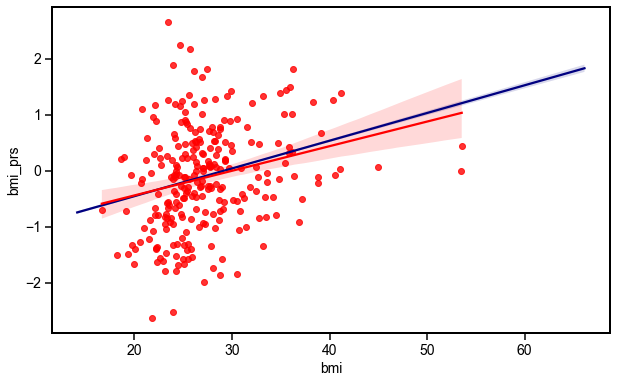

In [92]:
fig, axes = plt.subplots(figsize=(10,6))
sns.regplot(pdf, x="bmi", y="bmi_prs", scatter=False, ax=axes, color="navy")
sns.regplot(pheno_sv_df, x="bmi", y="bmi_prs", ax=axes, color="red")
# sns.regplot(pheno_dv_df, x="bmi", y="bmi_prs", ax=axes, color="k", scatter=False)

<AxesSubplot: xlabel='bmi', ylabel='bmi_prs'>

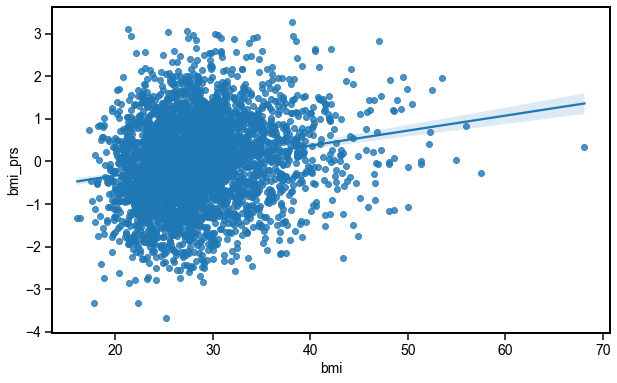

In [68]:
fig, axes = plt.subplots(figsize=(10,6))
sns.scatterplot(pheno_dv_df, x="bmi", y="bmi_prs", s=0.1, ax=axes, alpha=0.001)
sns.regplot(pheno_dv_df, x="bmi", y="bmi_prs", ax=axes)

In [43]:
from scipy.stats import kstest,ttest_ind

In [44]:
ttest_ind(pheno_sv_df.bmi, pheno_dv_df.bmi, alternative="greater")

TtestResult(statistic=-3.505352453071329, pvalue=0.9997694793869513, df=3973.0)

In [45]:
ttest_ind(pheno_sv_df.bmi_prs, pheno_dv_df.bmi_prs, alternative="less") 

TtestResult(statistic=-1.3192915921535568, pvalue=0.09357383636626776, df=3973.0)